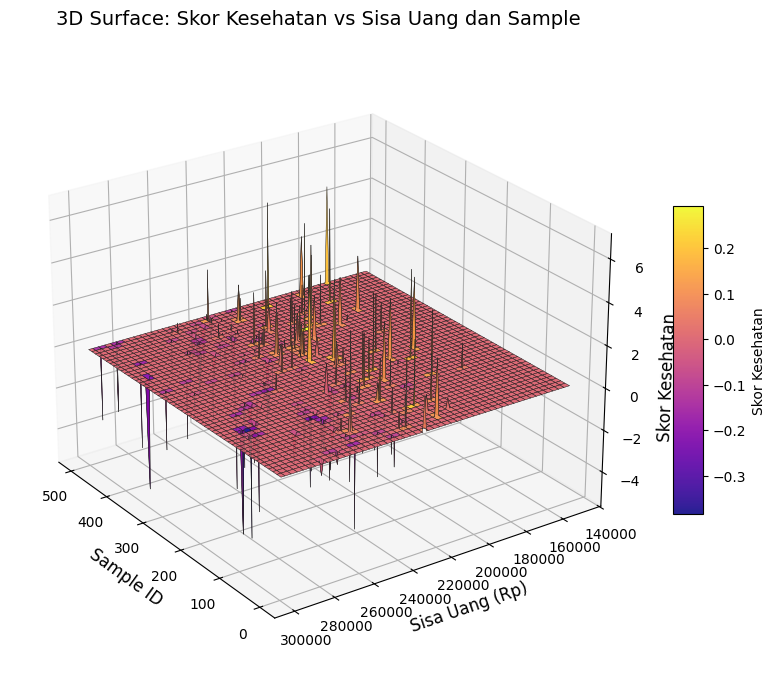

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

NPM= 19102         
np.random.seed(NPM)

makan =  pd.read_csv("makanan.csv")

budget= 1e6 #rupiah

wkenyang_base= 0.8
wrasa_base= 0.7
wsehat_base= 0.9 # simpangan lebih besar
wbosan_base= 0.2

skor_kumulatif= 0.0
SAMPLE_NUM= 500

sampleid= np.arange(0, 500)
# skor perorangan
skor= np.zeros(SAMPLE_NUM, dtype=np.double)
sisa= np.zeros(SAMPLE_NUM, dtype=np.double)
sehat= np.zeros(SAMPLE_NUM, dtype=np.double)
pilihankum= np.zeros(SAMPLE_NUM, dtype=np.double)

SISA_MININUM= 150e3
SISA_MAKSIMUM= 300e3
bin_sisa= np.arange(SISA_MININUM, SISA_MAKSIMUM, 1000)
resp_sehat= np.zeros((SAMPLE_NUM, len(bin_sisa)), dtype=np.double)
resp_pilih= np.zeros((SAMPLE_NUM, 62), dtype=np.double)

for n in range(0, SAMPLE_NUM):
    budget=1e6
    skor_kumulatif= 0
    skor_sehat= 0
    
    for i in range(0, 31): # hari
        # makan pertama, pilih secara acak
        pilihan= np.random.randint(0, len(makan))
        # update weight factor
        w_kenyang= np.random.normal(loc=wkenyang_base, scale=0.2)
        w_rasa= np.random.normal(loc=wrasa_base, scale=0.2)
        w_sehat= np.random.normal(loc=wsehat_base, scale=0.4)
        w_bosan= np.random.normal(loc=wbosan_base, scale=0.2)
        skor_kumulatif= skor_kumulatif + \
            w_kenyang * makan['kenyang'][pilihan]\
            + w_rasa * makan['rasa'][pilihan] \
            + w_sehat * makan['sehat'][pilihan] \
            - w_bosan * makan['bosan'][pilihan]
        skor_sehat += makan['sehat'][pilihan] - 0.5
        budget = budget - makan['harga'][pilihan]
        #print(f"hari {i} pagi: {makan['makanan'][pilihan]}")    
        resp_pilih[n][2*1]= pilihan
        
        # makan keduas
        pilihan= np.random.randint(0, len(makan))
        # update weight factor
        w_kenyang= np.random.normal(loc=wkenyang_base, scale=0.2)
        w_rasa= np.random.normal(loc=wrasa_base, scale=0.2)
        w_sehat= np.random.normal(loc=wsehat_base+0.2, scale=0.4)
        w_bosan= np.random.normal(loc=wbosan_base*2, scale=0.2)
        skor_kumulatif= skor_kumulatif + \
            w_kenyang * makan['kenyang'][pilihan]\
            + w_rasa * makan['rasa'][pilihan] \
            + w_sehat * makan['sehat'][pilihan] \
            - w_bosan * makan['bosan'][pilihan]
        skor_sehat += makan['sehat'][pilihan] - 0.5
        budget = budget - makan['harga'][pilihan]
        #print(f"hari {i} malam: {makan['makanan'][pilihan]}")    
        resp_pilih[n][2*1+1]= pilihan
    
    # print(f"skor: {skor_kumulatif}, sisa uang: {budget}")    
    sisa[n]= budget
    skor[n]= skor_kumulatif
    sehat[n]= skor_sehat
    # print(f"{n} skor sehat:{skor_sehat}")
    
    idx_bin = int((budget - SISA_MININUM) / 1000)
    if 0 <= idx_bin < len(bin_sisa):   # aman dari IndexError
        resp_sehat[n][idx_bin] = skor_sehat

# np.corrcoef(skor, sisa)
# np.histogram(sisa)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')

# Meshgrid
Y, X = np.meshgrid(bin_sisa, sampleid)

# Surface dengan transparansi
surf = ax.plot_surface(
    X, Y, resp_sehat, 
    cmap='plasma',
    edgecolor='k', linewidth=0.3,
    alpha=0.9
)

# Tambahkan wireframe tipis agar permukaan lebih terbaca
ax.plot_wireframe(X, Y, resp_sehat, color='gray', linewidth=0.2, alpha=0.4)

# Ubah sudut pandang
ax.view_init(elev=25, azim=145)   

# Label + judul
ax.set_title("3D Surface: Skor Kesehatan vs Sisa Uang dan Sample", fontsize=14, pad=20)
ax.set_xlabel("Sample ID", fontsize=12)
ax.set_ylabel("Sisa Uang (Rp)", fontsize=12)
ax.set_zlabel("Skor Kesehatan", fontsize=12)

# Colorbar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label="Skor Kesehatan")

plt.show()



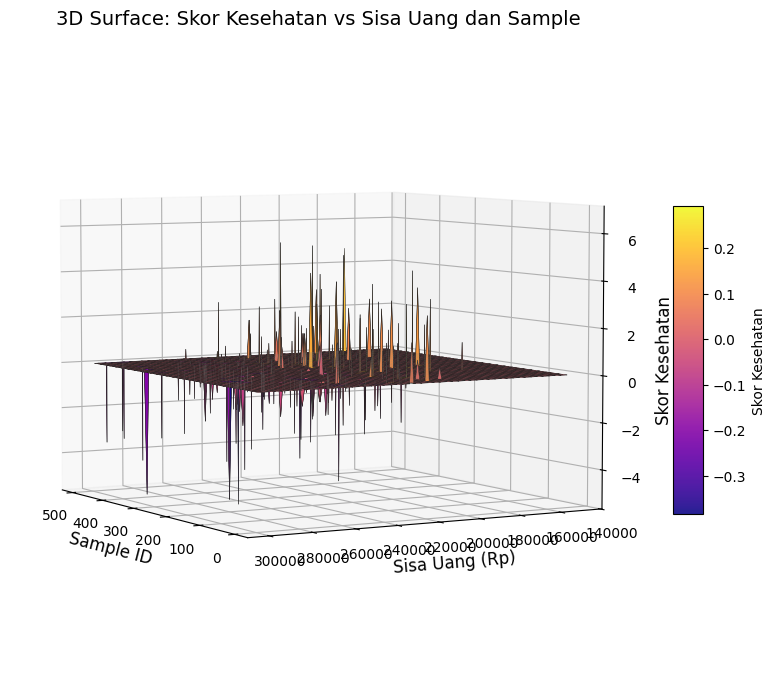

In [29]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')

# Meshgrid
Y, X = np.meshgrid(bin_sisa, sampleid)

# Surface dengan transparansi
surf = ax.plot_surface(
    X, Y, resp_sehat, 
    cmap='plasma',
    edgecolor='k', linewidth=0.3,   # kasih grid tipis
    alpha=0.9
)

# Tambahkan wireframe tipis agar permukaan lebih terbaca
ax.plot_wireframe(X, Y, resp_sehat, color='gray', linewidth=0.2, alpha=0.4)

# Ubah sudut pandang
ax.view_init(elev=5, azim=150)

# Label + judul
ax.set_title("3D Surface: Skor Kesehatan vs Sisa Uang dan Sample", fontsize=14, pad=20)
ax.set_xlabel("Sample ID", fontsize=12)
ax.set_ylabel("Sisa Uang (Rp)", fontsize=12)
ax.set_zlabel("Skor Kesehatan", fontsize=12)

# Colorbar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label="Skor Kesehatan")

plt.show()

Dua hasil gambar tersebut hanya berbeda pada sudut pandang saja. Pada hasil tersebut dapat dilihat bahwa polanya sebagian besar ada pada titik di sekitar 0 yang artinya mayoritas pola makan menghasilkan skor kesehatan netral. Dan ada lonjakan-lonjakan positif maupun negatif yang menunjukkan beberapa kombinasi makanan yang memiliki tingkat sehat tinggi atau justru sangat rendah. Sedangkan distribusi sisa uang tidak terlalu mempengaruhi kesehatan karena lonjakan ada di berbagai titik sisa uang, sehingga kesehatan lebih dipengaruhi jenis makanan daripada hanya jumlah uang yang tersisa.

In [30]:
# (1) cari pola makan mana saja yang menghasilkan nilai kumulatif kesehatan (resp_sehat) positif

idx_sehat_pos = np.where(sehat > 0)[0]
print("Jumlah pola makan sehat (resp_sehat > 0):", len(idx_sehat_pos))

Jumlah pola makan sehat (resp_sehat > 0): 279


Berdasarkan hasil tersebut dapat diketahui dari total 500 simulasi pola makan, ada 279 pola yang menghasilkan skor kesehatan positif, yang artinya lebih dari setengah percobaan acak menghasilkan pola makan yang lebih sehat daripada tidak sehat

In [31]:
# (2) cari titik-titik dengan sisa uang bulanan positif dari (1)

idx_sehat_dan_sisa = [i for i in idx_sehat_pos if sisa[i] > 0]
print("Jumlah pola makan sehat + sisa uang positif:", len(idx_sehat_dan_sisa))


Jumlah pola makan sehat + sisa uang positif: 279


Kemudian dari hasil 279 pola sehat sebelumnya, ternyata didapatkan hasil bahwa masih menyisakan anggaran bulanan lebih dari 0 rupiah yang artinya tidak ada timbal balik besar antara kesehatan dan keuangan, dimana kita dapat makan sehat tanpa menghabiskan seluruh budget.

In [32]:
# (3) cari titik dengan skor skumulatif terbesar (skor) di mana nilai kumulatif kesehatannya positif

print("Indeks terbaik:", best_idx)
print("Skor terbaik:", skor[best_idx])
print("Sisa uang:", sisa[best_idx])
print("Skor kesehatan:", sehat[best_idx])


Indeks terbaik: 285
Skor terbaik: 106.04909939056793
Sisa uang: 209000.0
Skor kesehatan: 4.699999999999999


Dari hasil tersebut dapat diketahui bahwa pola makan terbaik ditemukan pada simulasi ke 285 dari 500 percobaan, dengan skor terbaik 106.04 yang merupakan skor gabungan antara kenyang, rasa, sehat, dan bosan, dimana nilai ini tertinggi di antara semua pola sehat. Selain itu sisa uang 209000 rupiah masih tersisa dari total budget 1 juta dan dengan skor kesehatan yang cukup tinggi yaitu 4.7 yang artinya pola ini cukup sehat dibanding pola lain.

In [33]:
# (4) tampikan jadwal makanan sesuai pilihan (resp_pilih)best_idx = idx_sehat_dan_sisa[np.argmax(skor[idx_sehat_dan_sisa])]

jadwal = resp_pilih[best_idx]
print("\nJadwal makanan terbaik (index ke-", best_idx, "):")
for hari in range(31):
    pagi = int(jadwal[2*hari])
    malam = int(jadwal[2*hari+1])
    print(f"Hari {hari+1}: Pagi = {makan['makanan'][pagi]}, Malam = {makan['makanan'][malam]}")



Jadwal makanan terbaik (index ke- 285 ):
Hari 1: Pagi = ayamgeprek, Malam = ayamgeprek
Hari 2: Pagi = nasigoreng, Malam = warteg
Hari 3: Pagi = ayamgeprek, Malam = ayamgeprek
Hari 4: Pagi = ayamgeprek, Malam = ayamgeprek
Hari 5: Pagi = ayamgeprek, Malam = ayamgeprek
Hari 6: Pagi = ayamgeprek, Malam = ayamgeprek
Hari 7: Pagi = ayamgeprek, Malam = ayamgeprek
Hari 8: Pagi = ayamgeprek, Malam = ayamgeprek
Hari 9: Pagi = ayamgeprek, Malam = ayamgeprek
Hari 10: Pagi = ayamgeprek, Malam = ayamgeprek
Hari 11: Pagi = ayamgeprek, Malam = ayamgeprek
Hari 12: Pagi = ayamgeprek, Malam = ayamgeprek
Hari 13: Pagi = ayamgeprek, Malam = ayamgeprek
Hari 14: Pagi = ayamgeprek, Malam = ayamgeprek
Hari 15: Pagi = ayamgeprek, Malam = ayamgeprek
Hari 16: Pagi = ayamgeprek, Malam = ayamgeprek
Hari 17: Pagi = ayamgeprek, Malam = ayamgeprek
Hari 18: Pagi = ayamgeprek, Malam = ayamgeprek
Hari 19: Pagi = ayamgeprek, Malam = ayamgeprek
Hari 20: Pagi = ayamgeprek, Malam = ayamgeprek
Hari 21: Pagi = ayamgeprek, Mal

Pola terbaik ternyata didominasi oleh 1 makanan saja, hal ini menandakan adanya bias data dimana sistem menilai ayam geprek paling optimal dari segi kenyang, rasa, dan harga

In [34]:
import numpy as np

# bobot faktor
w_kenyang = 0.4
w_rasa = 0.3
w_sehat = 0.2
w_bosan = 0.1

N_HARI = 31
jadwal = []

bosan_dynamic = makan['bosan'].copy()

for hari in range(N_HARI):
    for waktu in ["Pagi", "Malam"]:
        skor = (
            w_kenyang * makan['kenyang'] +
            w_rasa * makan['rasa'] +
            w_sehat * makan['sehat'] -
            w_bosan * bosan_dynamic
        )

        # pastikan skor tidak negatif
        skor = np.maximum(skor, 0)

        # kalau semua skor nol → pakai distribusi merata
        if skor.sum() == 0:
            prob = np.ones(len(makan)) / len(makan)
        else:
            prob = skor / skor.sum()

        pilihan = np.random.choice(len(makan), p=prob)
        jadwal.append(pilihan)

        # tingkatkan bosan biar variasi muncul
        bosan_dynamic[pilihan] += 1

# cetak jadwal
print("Jadwal makanan terbaik dengan variasi:")
for hari in range(N_HARI):
    pagi = jadwal[2*hari]
    malam = jadwal[2*hari+1]
    print(f"Hari {hari+1}: Pagi = {makan['makanan'][pagi]}, Malam = {makan['makanan'][malam]}")


Jadwal makanan terbaik dengan variasi:
Hari 1: Pagi = nasi telur, Malam = ayamgeprek
Hari 2: Pagi = bakso, Malam = cireng
Hari 3: Pagi = nasi telur, Malam = ayamgeprek
Hari 4: Pagi = warteg, Malam = seblak
Hari 5: Pagi = capcay, Malam = nasibakar
Hari 6: Pagi = nasigoreng, Malam = nasipadang
Hari 7: Pagi = bakso, Malam = nasibakar
Hari 8: Pagi = gorengan, Malam = telurgulung
Hari 9: Pagi = nasigoreng, Malam = nasibakar
Hari 10: Pagi = nasi telur, Malam = nasibakar
Hari 11: Pagi = roti, Malam = nasi telur
Hari 12: Pagi = bakso, Malam = telurgulung
Hari 13: Pagi = warteg, Malam = nasipadang
Hari 14: Pagi = nasigoreng, Malam = ayamgeprek
Hari 15: Pagi = mi instan , Malam = nasigoreng
Hari 16: Pagi = tahutek, Malam = gorengan
Hari 17: Pagi = bakso, Malam = bakso
Hari 18: Pagi = nasipadang, Malam = nasipadang
Hari 19: Pagi = seblak, Malam = roti
Hari 20: Pagi = roti, Malam = mi instan 
Hari 21: Pagi = capcay, Malam = mieayam
Hari 22: Pagi = warteg, Malam = bakso
Hari 23: Pagi = cireng, Mala

Berbeda dengan sebelumnya dimana jadwal cenderung monoton, pada jadwal ini jauh lebih bervariatif dikarenakan mekanisme bosan berhasil mendorong model untuk tidak memilih makanan yang sama berulang-ulang sehingga terjadi keseimbangan variasi yang membuat hasil lebih realistis dan menghindari menu favorit tunggal seperti ayam geprek.